In [216]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json

PATH_IN = './data/'


Load dataset and CMU cleaning

In [217]:
PATH_IN = './data/MovieSummaries'
character_fname = os.path.join(PATH_IN, 'character.metadata.tsv')

character_column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor DOB",
    "Actor gender",
    "Actor height",
    "Actor ethnicity",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID",
]
        
characters = pd.read_csv(character_fname, sep= '\t', names= character_column_names)
characters.info()

characters['Movie release Year'] = characters['Movie release date'].str.split('-').str[0].astype('Int64')
characters['Movie release Month'] = characters['Movie release date'].str.split('-').str[1].astype('Int64')
characters['Movie release Day'] = characters['Movie release date'].str.split('-').str[2].astype('Int64')
characters.drop(columns=['Movie release date'], inplace=True)

characters['Actor DOB'] = characters['Actor DOB'].str.split('T', expand=True)[0]
characters['Actor DOB Year'] = characters['Actor DOB'].str.split('-').str[0].astype('Int64')
characters['Actor DOB Month'] = characters['Actor DOB'].str.split('-').str[1].astype('Int64')
characters['Actor DOB Day'] = characters['Actor DOB'].str.split('-').str[2].astype('Int64')
characters.drop(columns=['Actor DOB'], inplace=True)


characters_probably_not_useful = characters[['Freebase movie ID', 'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID']]
characters.drop(columns=['Freebase movie ID', 'Freebase character/actor map ID', 'Freebase character ID', 'Freebase actor ID'], inplace=True)

characters = characters[['Wikipedia movie ID', 'Movie release Year', 'Character name', 'Actor DOB Year', 'Actor gender', 'Actor height', 'Actor ethnicity', 'Actor name', 
                 'Actor age at movie release', 'Movie release Month', 'Movie release Day', 'Actor DOB Month', 'Actor DOB Day']]

characters['Character name'] = characters['Character name'].astype('string')
characters['Actor ethnicity'] = characters['Actor ethnicity'].astype('string')
characters['Actor name'] = characters['Actor name'].astype('string')


characters['Actor gender'] = characters['Actor gender'].astype('category')

characters['Wikipedia movie ID'] = pd.to_numeric(characters['Wikipedia movie ID'], downcast='integer')
characters['Movie release Year'] = pd.to_numeric(characters['Movie release Year'], downcast='integer')
characters['Actor DOB Year'] = pd.to_numeric(characters['Actor DOB Year'], downcast='integer')
characters['Actor height'] = pd.to_numeric(characters['Actor height'], downcast='float')
characters['Actor age at movie release'] = pd.to_numeric(characters['Actor age at movie release'], downcast='integer')
characters['Movie release Month'] = pd.to_numeric(characters['Movie release Month'], downcast='integer')
characters['Movie release Day'] = pd.to_numeric(characters['Movie release Day'], downcast='integer')
characters['Actor DOB Month'] = pd.to_numeric(characters['Actor DOB Month'], downcast='integer')
characters['Actor DOB Day'] = pd.to_numeric(characters['Actor DOB Day'], downcast='integer')

characters_probably_not_useful['Freebase movie ID'] = characters_probably_not_useful['Freebase movie ID'].astype('string')
characters_probably_not_useful['Freebase character/actor map ID'] = characters_probably_not_useful['Freebase character/actor map ID'].astype('string')
characters_probably_not_useful['Freebase character ID'] = characters_probably_not_useful['Freebase character ID'].astype('string')
characters_probably_not_useful['Freebase actor ID'] = characters_probably_not_useful['Freebase actor ID'].astype('string')

print("\n")
characters.info()
characters_probably_not_useful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               450669 non-null  int64  
 1   Freebase movie ID                450669 non-null  object 
 2   Movie release date               440674 non-null  object 
 3   Character name                   192794 non-null  object 
 4   Actor DOB                        344524 non-null  object 
 5   Actor gender                     405060 non-null  object 
 6   Actor height                     154824 non-null  float64
 7   Actor ethnicity                  106058 non-null  object 
 8   Actor name                       449441 non-null  object 
 9   Actor age at movie release       292556 non-null  float64
 10  Freebase character/actor map ID  450669 non-null  object 
 11  Freebase character ID            192804 non-null  object 
 12  Fr

In [218]:
movie_fname = os.path.join(PATH_IN, 'movie.metadata.tsv')

movie_column_names = [
    "Wikipedia movie ID", 
    "Freebase movie ID", 
    "Movie name", 
    "Movie release date", 
    "Movie box office revenue", 
    "Movie runtime", 
    "Movie languages", 
    "Movie countries", 
    "Movie genres",
]

movies = pd.read_csv(movie_fname,  sep= '\t', names= movie_column_names)
movies.info()

movies.loc[46808, 'Movie countries'] = '{"/m/03rk0": "India"}'
movies.loc[67202, 'Movie countries'] = '{"/m/03rk0": "India"}'
movies.loc[67202, 'Movie languages'] = '{"/m/0999q": "Malayalam Language"}'
movies.loc[72685, 'Movie countries'] = '{"/m/084n_": "Weimar Republic", "/m/0345h": "Germany"}'

movies.loc[1825, "Movie languages"] = '{"/m/04306rv": "German Language"}'
movies.loc[7855, "Movie languages"] = '{"/m/02bjrlw": "Italian Language", "/m/06nm1": "Spanish Language", "/m/064_8sq": "French Language", "/m/04h9h": "Latin Language", "/m/02h40lc": "English Language", "/m/05qqm": "Polish Language", "/m/04306rv": "German Language"}'
movies.loc[20807, "Movie languages"] = '{"/m/0k0sv": "Croatian language", "/m/02bjrlw": "Italian Language", "/m/06b_j": "Russian Language", "/m/06nm1": "Spanish Language", "/m/064_8sq": "French Language", "/m/05zjd": "Portuguese Language", "/m/02h40lc": "English Language", "/m/06zvd": "Slovenian language", "/m/04306rv": "German Language", "/m/02hwhyv": "Korean Language"}'
movies.loc[25679, "Movie languages"] = '{"/m/05qqm": "Polish Language", "/m/0cjk9": "Ukrainian Language", "/m/0880p": "Yiddish Language", "/m/04306rv": "German Language"}'
movies.loc[30562, "Movie languages"] = '{"/m/02h40lc": "English Language", "/m/06b_j": "Russian Language", "/m/04306rv": "German Language"}'
movies.loc[68137, "Movie languages"] = '{"/m/02hwyss": "Turkish Language", "/m/04306rv": "German Language"}'

movies['Movie release Year'] = movies['Movie release date'].str.split('-').str[0].astype('Int64')
movies['Movie release Month'] = movies['Movie release date'].str.split('-').str[1].astype('Int64')
movies['Movie release Day'] = movies['Movie release date'].str.split('-').str[2].astype('Int64')
movies.drop(columns=['Movie release date'], inplace=True)

movies['parsed languages'] = movies['Movie languages'].apply(ast.literal_eval)
movies['language codes'] = movies['parsed languages'].apply(lambda x: ','.join(list(x.keys())))
movies['languages'] = movies['parsed languages'].apply(lambda x: ','.join([val.replace(' Language', '') for val in list(x.values())]))
movies.drop(columns=['Movie languages', 'parsed languages'], inplace=True)

movies['parsed countries'] = movies['Movie countries'].apply(ast.literal_eval)
movies['countries codes'] = movies['parsed countries'].apply(lambda x: ','.join(list(x.keys())))
movies['countries'] = movies['parsed countries'].apply(lambda x: ','.join(list(x.values())))
movies.drop(columns=['Movie countries', 'parsed countries'], inplace=True)

movies['parsed genres'] = movies['Movie genres'].apply(ast.literal_eval)
movies['genres codes'] = movies['parsed genres'].apply(lambda x: ','.join(list(x.keys())))
movies['genres'] = movies['parsed genres'].apply(lambda x: ','.join(list(x.values())))
movies.drop(columns=['Movie genres', 'parsed genres'], inplace=True)


movies_probably_not_useful = movies[['Freebase movie ID', 'language codes', 'countries codes', 'genres codes']]
movies.drop(columns=['Freebase movie ID', 'language codes', 'countries codes', 'genres codes'], inplace=True)

movies.rename(columns={
    'languages': 'Movie languages',
    'countries': 'Movie countries',
    'genres': 'Movie genres'
}, inplace=True)
movies = movies[['Wikipedia movie ID', 'Movie name', 'Movie release Year', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres', 
                 'Movie release Month', 'Movie release Day']]

movies['Movie name'] = movies['Movie name'].astype('string')
movies['Movie languages'] = movies['Movie languages'].astype('string')
movies['Movie countries'] = movies['Movie countries'].astype('string')
movies['Movie genres'] = movies['Movie genres'].astype('string')
movies['Wikipedia movie ID'] = pd.to_numeric(movies['Wikipedia movie ID'], downcast='integer')
movies['Movie release Year'] = pd.to_numeric(movies['Movie release Year'], downcast='integer')
movies['Movie release Month'] = pd.to_numeric(movies['Movie release Month'], downcast='integer')
movies['Movie release Day'] = pd.to_numeric(movies['Movie release Day'], downcast='integer')
movies['Movie box office revenue'] = pd.to_numeric(movies['Movie box office revenue'], downcast='float')
movies['Movie runtime'] = pd.to_numeric(movies['Movie runtime'], downcast='float')

movies_probably_not_useful['Freebase movie ID'] = movies_probably_not_useful['Freebase movie ID'].astype('string')
movies_probably_not_useful['language codes'] = movies_probably_not_useful['language codes'].astype('string')
movies_probably_not_useful['countries codes'] = movies_probably_not_useful['countries codes'].astype('string')
movies_probably_not_useful['genres codes'] = movies_probably_not_useful['genres codes'].astype('string')

print("\n")
movies.info()
movies_probably_not_useful.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wikipedia movie ID        81741 non-null  int64  
 1   Freebase movie ID         81741 non-null  object 
 2   Movie name                81741 non-null  object 
 3   Movie release date        74839 non-null  object 
 4   Movie box office revenue  8401 non-null   float64
 5   Movie runtime             61291 non-null  float64
 6   Movie languages           81741 non-null  object 
 7   Movie countries           81741 non-null  object 
 8   Movie genres              81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0  

Distribution of Actor gender

In [221]:
gender_distribution = characters.groupby(characters['Actor name'])['Actor gender'].value_counts().unstack(fill_value=0)
F = gender_distribution.iloc[:,0].sum()
H = gender_distribution.iloc[:,1].sum()

print('The percentage of actresses is {:0.2f} %'.format((F/(H+F)*100)))
print('The percentage of actors is : {:0.2f} % '.format((H/(F+H))*100))

The percentage of actresses is 33.28 %
The percentage of actors is : 66.72 % 


In [224]:
# merge character dataset with movies dataset
characters['Wikipedia movie ID'] = characters['Wikipedia movie ID'].astype('int64')
movies['Wikipedia movie ID'] = movies['Wikipedia movie ID'].astype('int64')
movies_characters = pd.merge(characters, movies, on='Wikipedia movie ID').dropna()

# Nuber of movies played by an actor 
nb_movies_per_actor = movies_characters.groupby(movies_characters['Actor name'])['Wikipedia movie ID'].count().reset_index().dropna()

# Mean movie box office revenue by actor
mean_movie_revenue_per_actor = movies_characters.groupby(movies_characters['Actor name'])['Movie box office revenue'].mean().reset_index().dropna()

Text(0.5, 0, 'Mean movie box office revenue per actor')

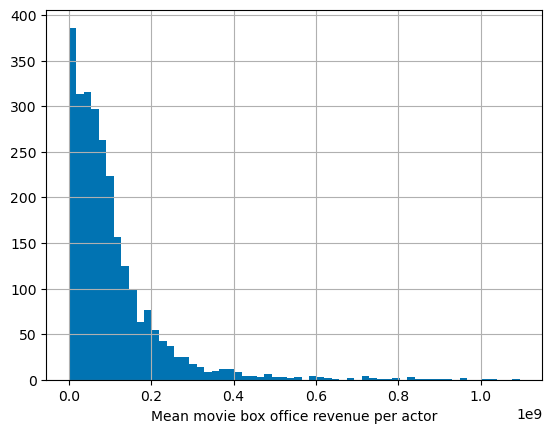

In [225]:
mean_movie_revenue_per_actor['Movie box office revenue'].hist(bins = 60)
plt.xlabel('Mean movie box office revenue per actor')

Text(0, 0.5, 'Number of movies played by an actor')

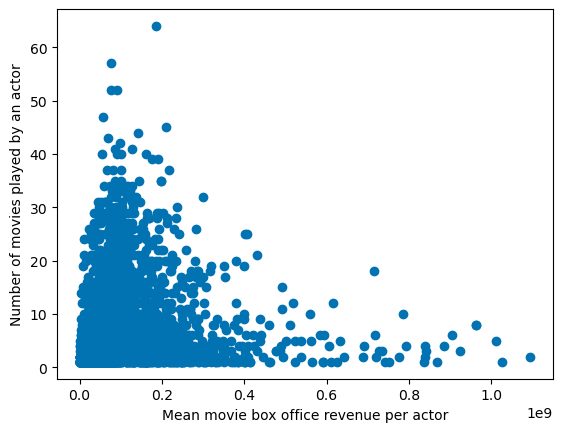

In [226]:
plt.scatter(mean_movie_revenue_per_actor['Movie box office revenue'],nb_movies_per_actor['Wikipedia movie ID'])
plt.xlabel('Mean movie box office revenue per actor')
plt.ylabel('Number of movies played by an actor')

Distribution of movies gender

In [227]:
movie_genres = movies['Movie genres'].dropna().copy()

print('Among {} entries, there are {} entries with movie genres.'.format(
    len(movie_genres),
    movie_genres.count()
))

#Create of a new column 'Genres_list' in the dataframe movies
movies['Genres_list'] = movie_genres.apply(lambda x: x.split(','))

movie_genres_counts = {}

for genre in movies['Genres_list'].dropna():
    for i in genre:
        if i in movie_genres_counts.keys():
            movie_genres_counts[i] += 1
        else:
            movie_genres_counts[i] = 1

movie_genres_counts = pd.Series(movie_genres_counts).sort_values(ascending=False)

Among 81741 entries, there are 81741 entries with movie genres.


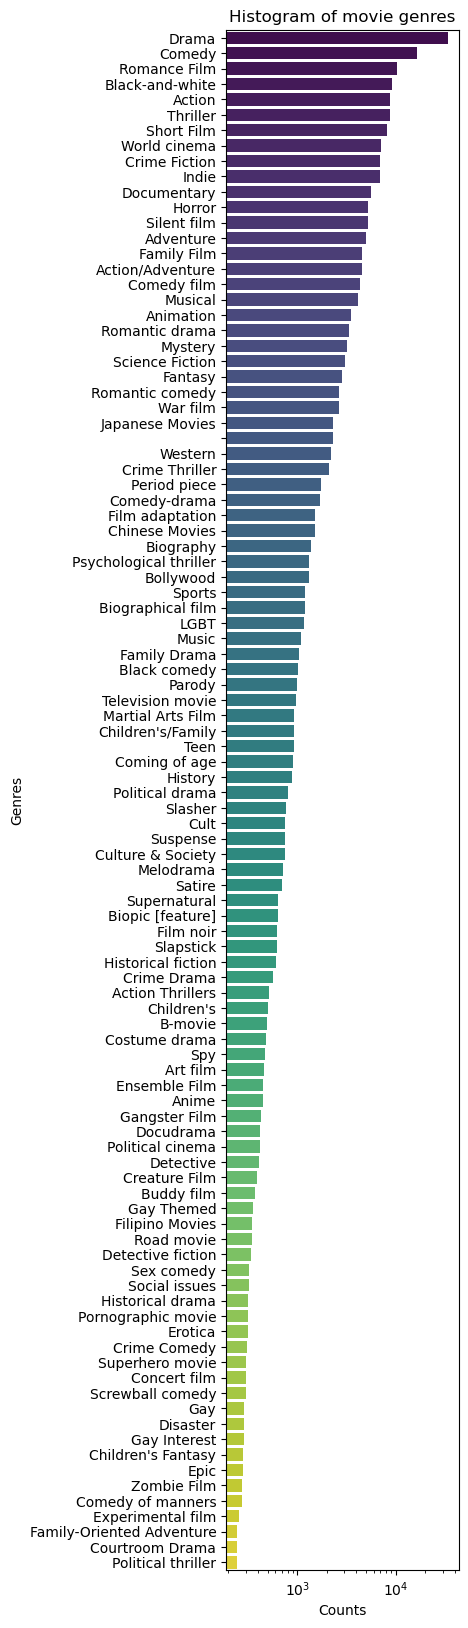

In [228]:
movie_genres_counts_filtered = movie_genres_counts[0:100]

plt.figure(figsize=(3, 20))
g = sns.barplot(y=movie_genres_counts_filtered.index, x=movie_genres_counts_filtered, orient='h', palette='viridis')
g.set_xscale('log')
g.set_title('Histogram of movie genres')
g.set_xlabel('Counts')
g.set_ylabel('Genres')
plt.show()